Import all nessesary libarys

In [1]:
import numpy as np
#import cupy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy import stats
%matplotlib inline
from ipywidgets import IntProgress
from IPython.display import display
import time

Definitions of all interchangeable variables of the script

In [2]:
# Definitions

# Matrix size

matrix_width = 50
matrix_height = 50

# Grayscale value range

gray_value_min = 0
gray_value_max = 32


# dampening factor

beta = 1

#itterations

itteration = 10

# definition Mask

mask = np.array([
        [-0.81,0,0,0,-0.81],
        [0,0.91,0.4,0.91,0],
        [0,0.4,0,0.4,0],
        [0,0.91,0.4,0.91,0],
        [-0.81,0,0,0,-0.81]
       ])

# definition Energyfunction

def energy(func, vst, xs, xt):
    #switch (func):
        #case orgf:
            #return np.sum(vst * (xs - xt))
        #case l1:
            return np.sum(vst * np.absolute(xs - xt))
            #check formula in the book  
        #case l2:
            #return np.sum(vst * (xs - xt)**2 )

applys the mask to the selected data point of the matrix

In [3]:
def apply_mask(height,width, matrix, mask):
    # create a copy of the matrix in the area of the mask
    matrix_slice = matrix.take(range((height - (mask.shape[0]-1)//2),(height + (mask.shape[0]+1)//2)),mode='wrap', axis=0).take(range((width - (mask.shape[1]-1)//2),(width + (mask.shape[1]+1)//2)),mode='wrap',axis=1)
    # calculate the probability of a data point to flip
    
    xk = np.arange(gray_value_max)
    pk = []
    denominator = 1
    for i in xk :
        pk.append((scipy.special.binom(gray_value_max, i)* np.exp(-beta*energy('l1', mask, matrix[height][width], matrix_slice))) / denominator )
    # würfeln welchen wert der datenpunkt hat (?good englisch expression?)
    matrix[height][width] = np.random.choice(a= xk, p= pk/np.sum(pk))
    
    return matrix
    

generate Matrix of white noise

CPU times: user 20 ms, sys: 123 µs, total: 20.2 ms
Wall time: 19.4 ms


array([[11, 24,  0, ...,  9,  3,  5],
       [ 5, 26, 16, ...,  3, 17, 19],
       [14, 19, 31, ..., 15, 11,  4],
       ...,
       [ 7,  1,  9, ...,  5,  9, 20],
       [12, 31, 19, ..., 15, 22, 21],
       [21, 31, 27, ..., 26,  5, 11]])

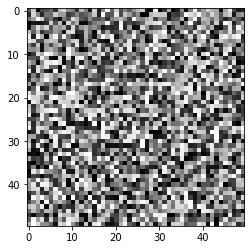

In [4]:
%%time
# generate Matrix of white noise
matrix = np.random.randint(gray_value_min,gray_value_max,size=(matrix_height,matrix_width))
# replaces 0 in the matrix with -1s (nessesary for a few masks)
# matrix = np.where(matrix == 0, -1, matrix)
# Print matrix as Image
plt.imshow(matrix,cmap='gray',vmin=gray_value_min, vmax=gray_value_max-1)
# Return (and print) matrix
matrix

apply mask to whole matrix

In [5]:
%%time
# itterate thrue the whole matrix and appy mask

f = IntProgress(min=0, max=itteration) # instantiate the bar
display(f) # display the bar
counter = 0
while counter < itteration:
    f.value += 1 # signal to increment the progress bar
    counter += 1
    for h in range(0, matrix.shape[0]):
        for w in range(0, matrix.shape[1]):
            matrix = apply_mask(h,w,matrix,mask) #faster with inplace ?
        

IntProgress(value=0, max=10)

CPU times: user 9.62 s, sys: 22.1 ms, total: 9.64 s
Wall time: 9.64 s


plot new matrix

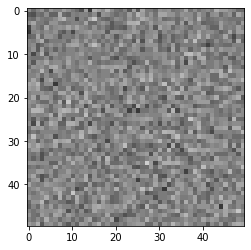

In [6]:
plt.imshow(matrix,cmap='gray',vmin=gray_value_min, vmax=gray_value_max-1)

safe new matrix to file

In [7]:
np.save("matrix", matrix)

Fragen für Mittwoch:
Formel (was liegt mit in der summe? O.o)
        e^-2 abhängigkeit zu anz graustufen
        mehrere pixel zeitgleich angucken (maske gerade anzahl (8x8 oder so mit 4 mittleren pixeln)
        exponenten ersetzen.. wie genau soll ich das umsetzen? O.o
        und wo genau brauch ich fakultäten